In [2]:
"""
In order to run the code as is, you will need scipy, pandas and tqdm installed 
(although tqdm is only needed for the progress bar, and pandas is only for the autocorrelation function)
All of these can be installed (on linux) from the command interface using 'pip'
""" 

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from gibbsrank import gibbs_sample
from eprank import eprank
import pandas
from cw2 import sorted_barplot
from scipy.stats import norm, multivariate_normal

We first need to load the data, stored in "tennis_data.mat". The data consists of an array, $W$ containing the names of each player, and an array, G, containing the results of all of the matches in the season. 

In [3]:
# set seed for reproducibility
np.random.seed(0)
# load data
data = sio.loadmat('tennis_data.mat')
# Array containing the names of each player
W = data['W']
# loop over array to format more nicely
for i, player in enumerate(W):
    W[i] = player[0]
# Array of size num_games x 2. The first entry in each row is the winner of game i, the second is the loser
G = data['G'] - 1
# Number of players
M = W.shape[0]
# Number of Games
N = G.shape[0]

In [5]:
W_list = W.tolist()
for i, player in enumerate(W_list):
    player.append(i)
W_list

[['Rafael-Nadal', 0],
 ['Juan-Monaco', 1],
 ['Juan-Martin-Del-Potro', 2],
 ['Mardy-Fish', 3],
 ['Roger-Federer', 4],
 ['Jo-Wilfried-Tsonga', 5],
 ['Guillermo-Garcia-Lopez', 6],
 ['Florian-Mayer', 7],
 ['Milos-Raonic', 8],
 ['Santiago-Giraldo', 9],
 ['Andy-Murray', 10],
 ['Richard-Gasquet', 11],
 ['David-Nalbandian', 12],
 ['Gilles-Muller', 13],
 ['Andy-Roddick', 14],
 ['Novak-Djokovic', 15],
 ['Fernando-Verdasco', 16],
 ['Ivan-Dodig', 17],
 ['Ryan-Sweeting', 18],
 ['Radek-Stepanek', 19],
 ['John-Isner', 20],
 ['Pablo-Andujar', 21],
 ['Ivan-Ljubicic', 22],
 ['Robin-Soderling', 23],
 ['Feliciano-Lopez', 24],
 ['Marin-Cilic', 25],
 ['Marcos-Baghdatis', 26],
 ['Michael-Llodra', 27],
 ['Gael-Monfils', 28],
 ['David-Ferrer', 29],
 ['Jarkko-Nieminen', 30],
 ['Kei-Nishikori', 31],
 ['Alexandr-Dolgopolov', 32],
 ['Tomas-Berdych', 33],
 ['Somdev-K-Devvarman', 34],
 ['Ivo-Karlovic', 35],
 ['Olivier-Rochus', 36],
 ['Bernard-Tomic', 37],
 ['Karol-Beck', 38],
 ['Ernests-Gulbis', 39],
 ['Nikolay-Davy

In [6]:
colours = ['firebrick', 'teal', 'goldenrod', 'purple']

# Task A - Gibbs Sampling

In [3]:
# number of iterations
num_iters = 1100
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:35<00:00, 31.14it/s]


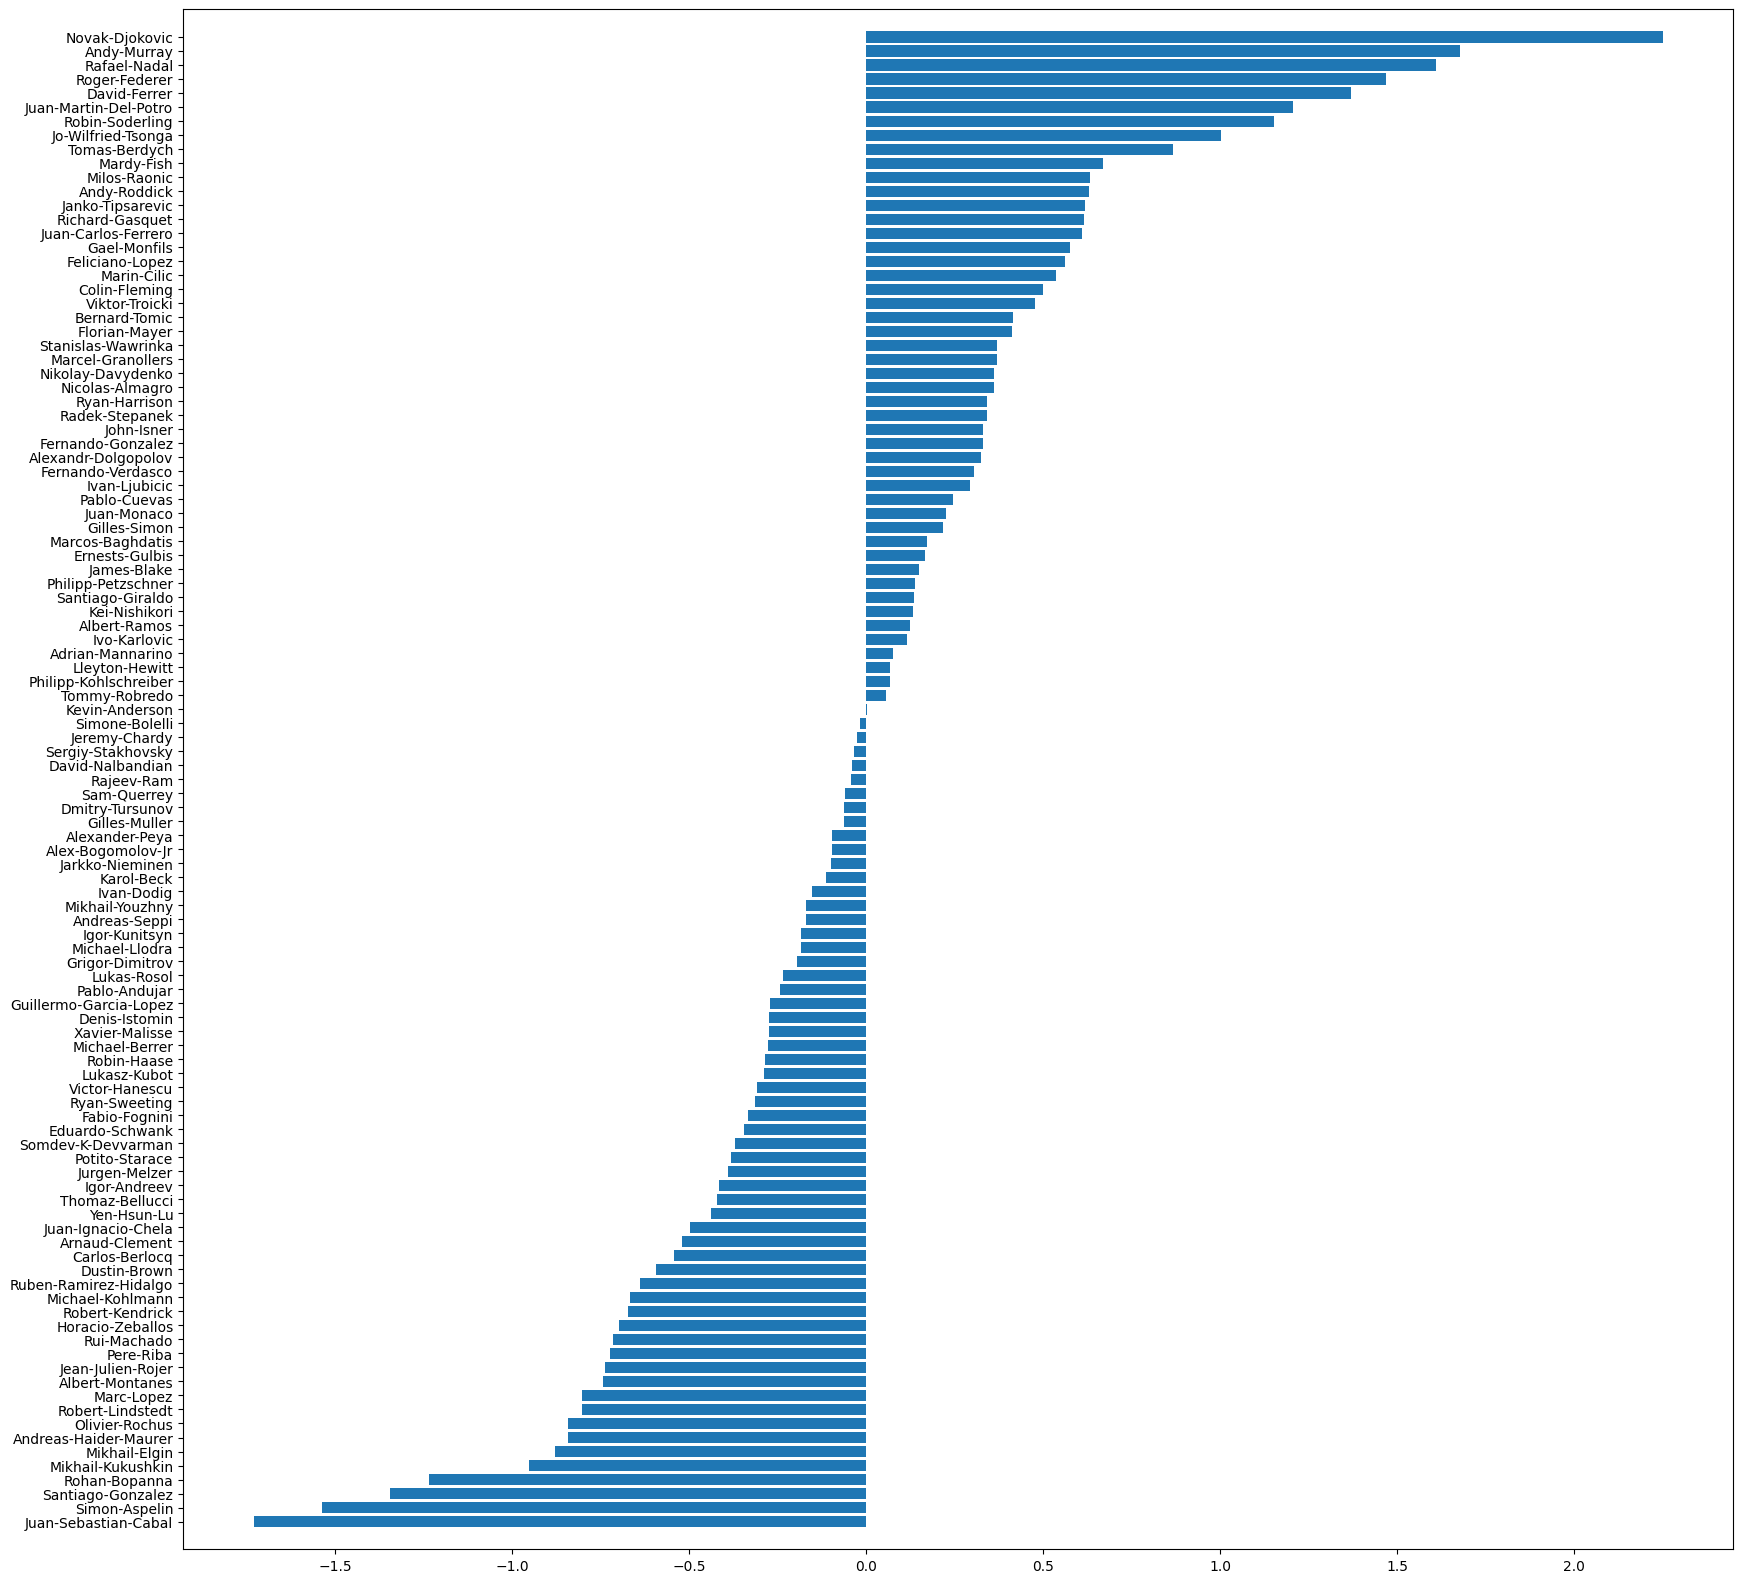

In [4]:
sorted_barplot(skill_samples[:,num_iters-1], W)

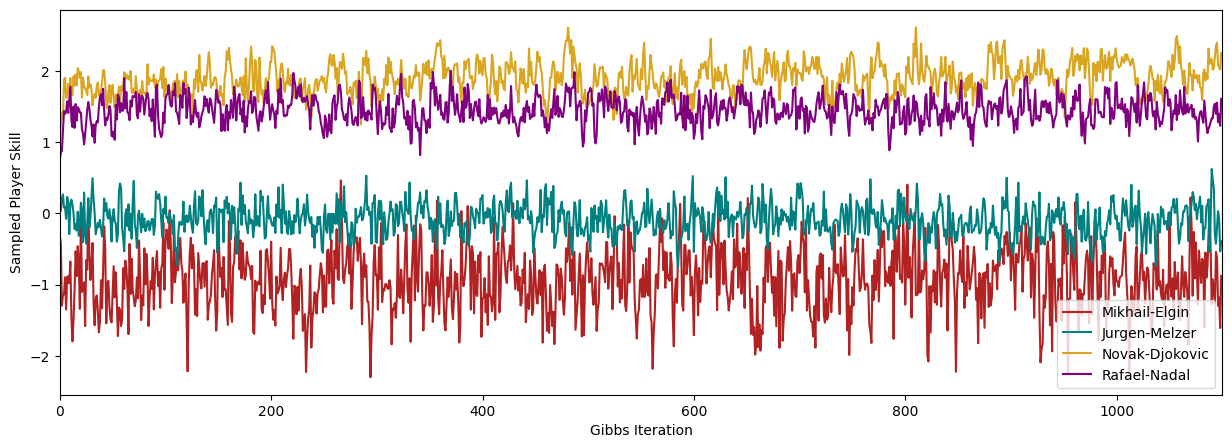

In [117]:
players = [104, 76, 15, 0]
plt.figure(figsize=(15,5))
for i, p in enumerate(players):
    plt.plot(skill_samples[p,0:num_iters], color=colours[i])

plt.xlim(0, num_iters)
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

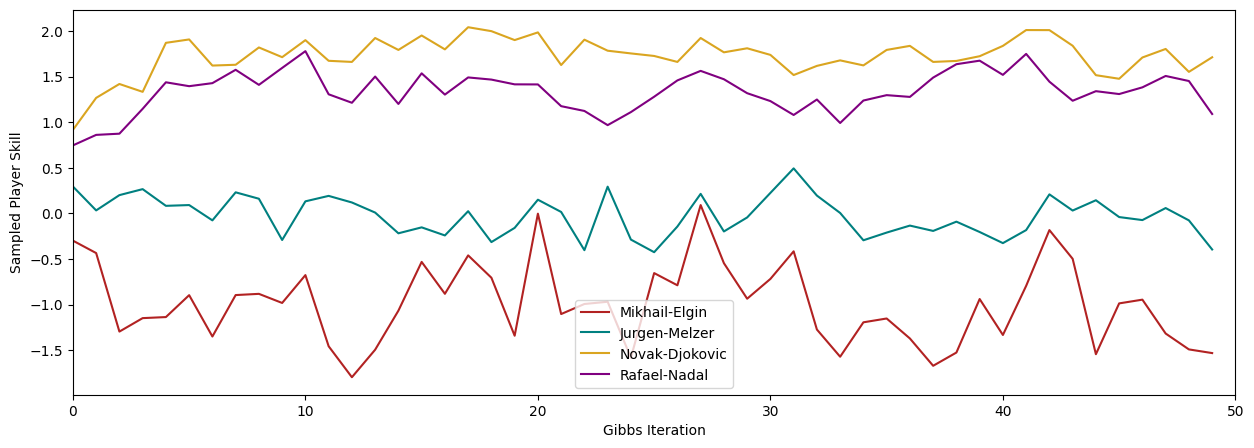

In [118]:
players = [104, 76, 15, 0]
plt.figure(figsize=(15,5))
for i, p in enumerate(players):
    plt.plot(skill_samples[p,0:50], color=colours[i])

plt.xlim(0, 50)
plt.xlabel("Gibbs Iteration")
plt.ylabel("Sampled Player Skill")
plt.legend(W[players][:,0])

Text(0, 0.5, 'Autocorrelation')

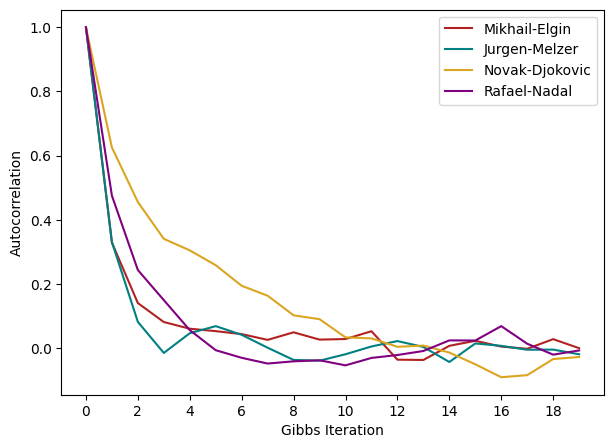

In [119]:
# Code for plotting the autocorrelation function for player p
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    autocor = np.zeros(num_vals)
    for j in range(num_vals):
        autocor[j]=pandas.Series.autocorr(pandas.Series(skill_samples[p,:]),lag=j)
    plt.plot(autocor, color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('Gibbs Iteration')
plt.ylabel('Autocorrelation')

# Task B - EP ranking

In [9]:
# number of iterations
num_iters = 2020
# perform gibbs sampling, skill samples is an num_players x num_samples array
skill_samples = gibbs_sample(G, M, num_iters)#, random_nums)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2020/2020 [01:18<00:00, 25.73it/s]


In [9]:
mean_over_iterations = []
precision_over_iterations = []
for i in range(20):
    # run message passing algorithm, returns mean and precision for each player
    mean_player_skills, precision_player_skills = eprank(G, M, i+1)
    mean_over_iterations.append(mean_player_skills)
    precision_over_iterations.append(precision_player_skills)
mean_over_iterations = np.array(mean_over_iterations)
precision_over_iterations = np.array(precision_over_iterations)

Text(0, 0.5, 'Player Skill Mean')

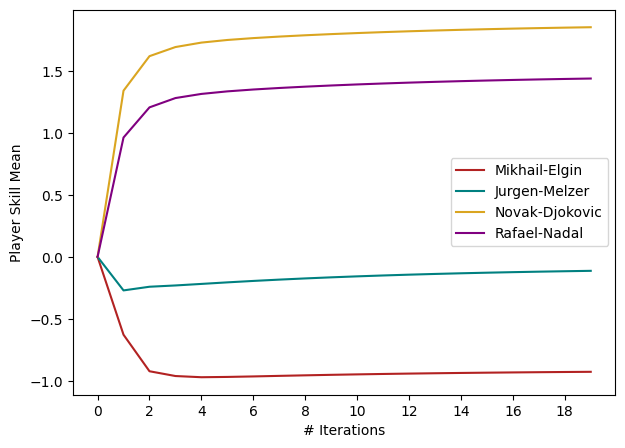

In [120]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(mean_over_iterations[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Player Skill Mean')

Text(0, 0.5, 'Player Skill Precision')

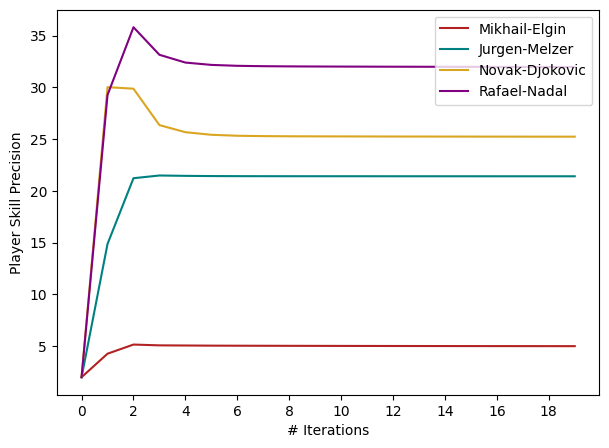

In [121]:
num_vals = 20
plt.figure(figsize=(7,5))
for i, p in enumerate(players):
    plt.plot(precision_over_iterations[:,p], color=colours[i])
plt.legend(W[players][:,0])
plt.xticks(np.arange(0,20,2))
plt.xlabel('# Iterations')
plt.ylabel('Player Skill Precision')

# Task C

Top four players from ATP ranking (lecture notes):
- Djokovic ~ 15
- Nadal ~ 0
- Federer ~ 4
- Murray ~ 10

In [12]:
top_four = [15, 0, 4, 10]

In [13]:
def prob_skill_higher(p1,p2,means,pres,performance=0):
    #probability that s1>s2 = p(s1-s2>0) let z=s1-s2 , z~(m1-m2,v1+v2)
    p1=int(p1)
    p2=int(p2)
    mean = means[p1]-means[p2]
    var = 1/pres[p1] + 1/pres[p2] + performance
    prob = 1 - norm.cdf((0-mean)/(var**0.5))
    return prob

In [14]:
t1 = np.zeros((4,4))
for col in range(4):
    for row in range(4):
        t1[row,col] = prob_skill_higher(top_four[row],top_four[col],mean_player_skills, precision_player_skills) ## prob that col beats row
print(t1)

[[0.5        0.94003266 0.90896222 0.98529688]
 [0.05996734 0.5        0.42664832 0.76577644]
 [0.09103778 0.57335168 0.5        0.81054383]
 [0.01470312 0.23422356 0.18945617 0.5       ]]


In [15]:
t1 = np.zeros((4,4))
for col in range(4):
    for row in range(4):
        t1[row,col] = prob_skill_higher(top_four[row],top_four[col],mean_player_skills, precision_player_skills,1) ## prob that col beats row
print(t1)

[[0.5        0.65548671 0.63803062 0.71970836]
 [0.34451329 0.5        0.48152202 0.57284519]
 [0.36196938 0.51847798 0.5        0.59074001]
 [0.28029164 0.42715481 0.40925999 0.5       ]]


# Task D

#### Djokovic vs Nadal

Marginal Skills by Gaussian

Djokovic mean: 1.8987963963575527
Djokovic std: 0.22511825336291144
Nadal mean: 1.4612289598285553
Nadal std: 0.1870835527456779
P(s1>s2)= 0.9325283662085044


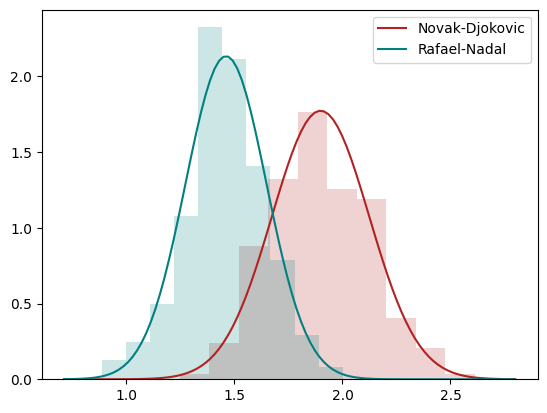

In [16]:
burn_in=20
thinning=10
idxs = range(burn_in, num_iters, thinning)
means = np.zeros(2)
stds = np.zeros(2)
data = []

for i in range(2):
    data.append(skill_samples[top_four[i]][idxs])
    means[i]=np.mean(skill_samples[top_four[i]][idxs])
    stds[i]=np.std(skill_samples[top_four[i]][idxs])
    
data = np.array(data)
    
print('Djokovic mean:', means[0])
print('Djokovic std:', stds[0])
print('Nadal mean:', means[1])
print('Nadal std:', stds[1])

mean = means[0]-means[1]
var = stds[0]**2 + stds[1]**2
skillprob = 1 - norm.cdf((0-mean)/(var**0.5))
print('P(s1>s2)=', skillprob)

x=np.linspace(means[1]-4*stds[1],means[0]+4*stds[0],100)
y1=norm.pdf(x,means[0],stds[0])
y2=norm.pdf(x,means[1],stds[1])
plt.hist(skill_samples[top_four[0]][idxs], density=True, color='firebrick', alpha=0.2)
plt.plot(x,y1, label=W[top_four[0]][0], color='firebrick')
plt.hist(skill_samples[top_four[1]][idxs], density=True, color='teal', alpha=0.2)
plt.plot(x,y2, label=W[top_four[1]][0], color='teal')
plt.legend()

Joint Skills by Gaussian

In [17]:
cov = np.cov(data[0], data[1])
cov

array([[0.05091394, 0.00811078],
       [0.00811078, 0.03516305]])

C:\Users\jeeva\AppData\Local\Temp\ipykernel_19344\1608748937.py:9: UserWarning: The following kwargs were not used by contour: 'label'
  cs = ax.contour(x, y, rv.pdf(pos), cmap="cool", label='Joint Distribution', levels=7)


Text(0, 0.5, 'Nadal Skill')

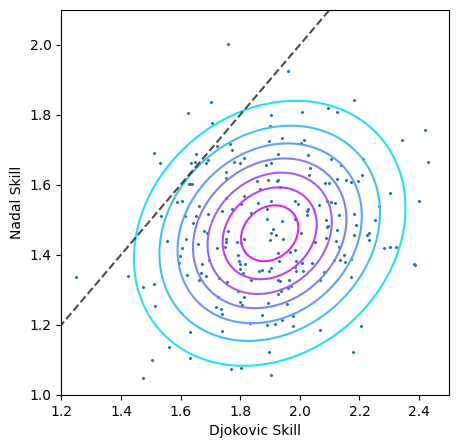

In [41]:
lower = 1
upper = 2.5
x, y = np.mgrid[1:2.5:.01, 1:2.5:.01]
x1 = np.arange(1, 2.5, 0.1)
pos = np.dstack((x, y))
rv = multivariate_normal(means, cov)
fig = plt.figure(figsize=((5,5)))
ax = fig.add_subplot(111)
cs = ax.contour(x, y, rv.pdf(pos), cmap="cool", label='Joint Distribution', levels=7)
ax.scatter(data[0], data[1], marker="x", s=2, label='Samples')
plt.plot(x1, x1, color='black', linestyle='--', alpha=0.7, label='skill1 = skill2')
plt.xlim(1.2, upper)
plt.ylim(lower, 2.1)
plt.xlabel("Djokovic Skill")
plt.ylabel("Nadal Skill")

In [33]:
it= 100000
count=0
for _ in range(it):
    sample = rv.rvs()
    if sample[0]>sample[1]:
        count+=1
prob = count/it
print('P(s1>s2)=', prob)

P(s1>s2)= 0.95237


Directly from samples

In [43]:
count = 0
for i in range(len(data[0])):
    if data[0][i] > data[1][i]:
        count += 1
prob = count/len(data[0])
print('P(s1>s2)=', prob)

P(s1>s2)= 0.9537037037037037


Using the best method from above, derive a 4 by 4 table for the skills,
and compare to the message passing algorithm.

Use joint distributions

In [55]:
top4_samples = np.zeros((4, len(idxs)))
top4_means = np.zeros(4)

for i, p in enumerate(top_four):
    p_samples = skill_samples[p][idxs]
    top4_samples[i] = p_samples
    top4_means[i] = np.mean(p_samples)

In [63]:
top4_means

array([1.8987964 , 1.46122896, 1.54109534, 1.29145715])

In [64]:
top4_means[[2, 3]]

array([1.54109534, 1.29145715])

In [65]:
it = 100000
for i, player1 in enumerate(top_four[:3]):
    for j, player2 in enumerate(top_four[i+1:]):
        print(i, j+i+1)
        rv_mean = top4_means[[i, j+i+1]]
        rv_cov = np.cov(top4_samples[i], top4_samples[j+i+1])
        rv = multivariate_normal(rv_mean, rv_cov)
        count = 0
        for _ in range(it):
            sample = rv.rvs()
            if sample[0]>sample[1]:
                count+=1
        prob = count/it
        print(f'P({player1} > {player2}) = {prob}')

0 1
P(15 > 0) = 0.95049
0 2
P(15 > 4) = 0.92627
0 3
P(15 > 10) = 0.97676
1 2
P(0 > 4) = 0.37548
1 3
P(0 > 10) = 0.74395
2 3
P(4 > 10) = 0.81217


# Task E

Rankings of all players

1) Empirical game outcome averages

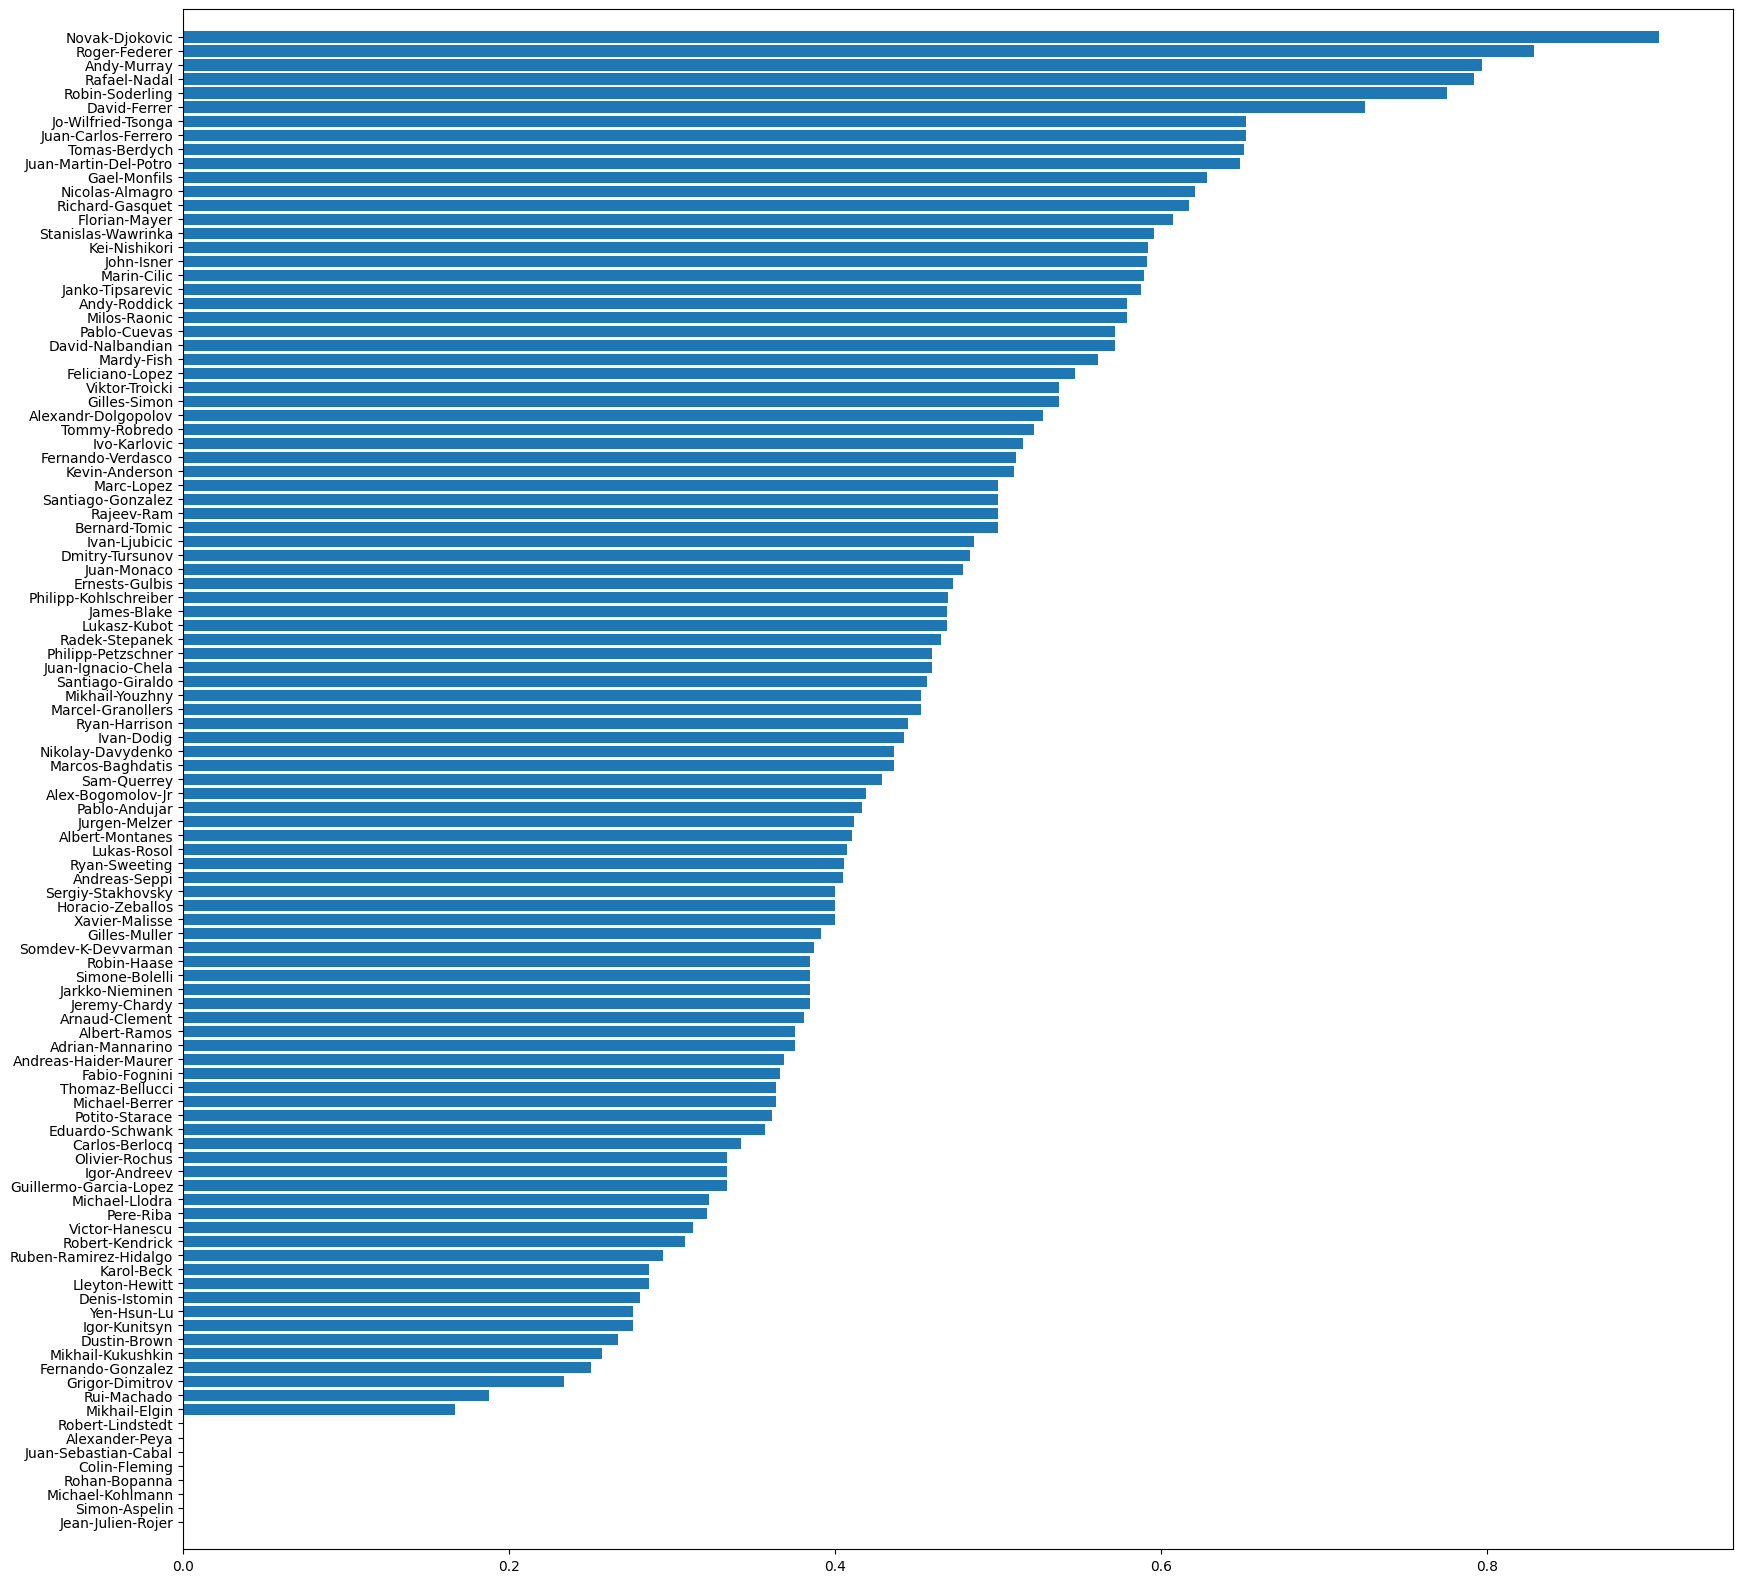

In [74]:
wins = np.zeros(M)
matches = np.zeros(M)

for match in G:
    matches[match[0]] += 1
    matches[match[1]] += 1
    wins[match[0]] +=1
    
win_ratios = np.divide(wins, matches)
sorted_barplot(win_ratios,W)

2) Gibbs sampling

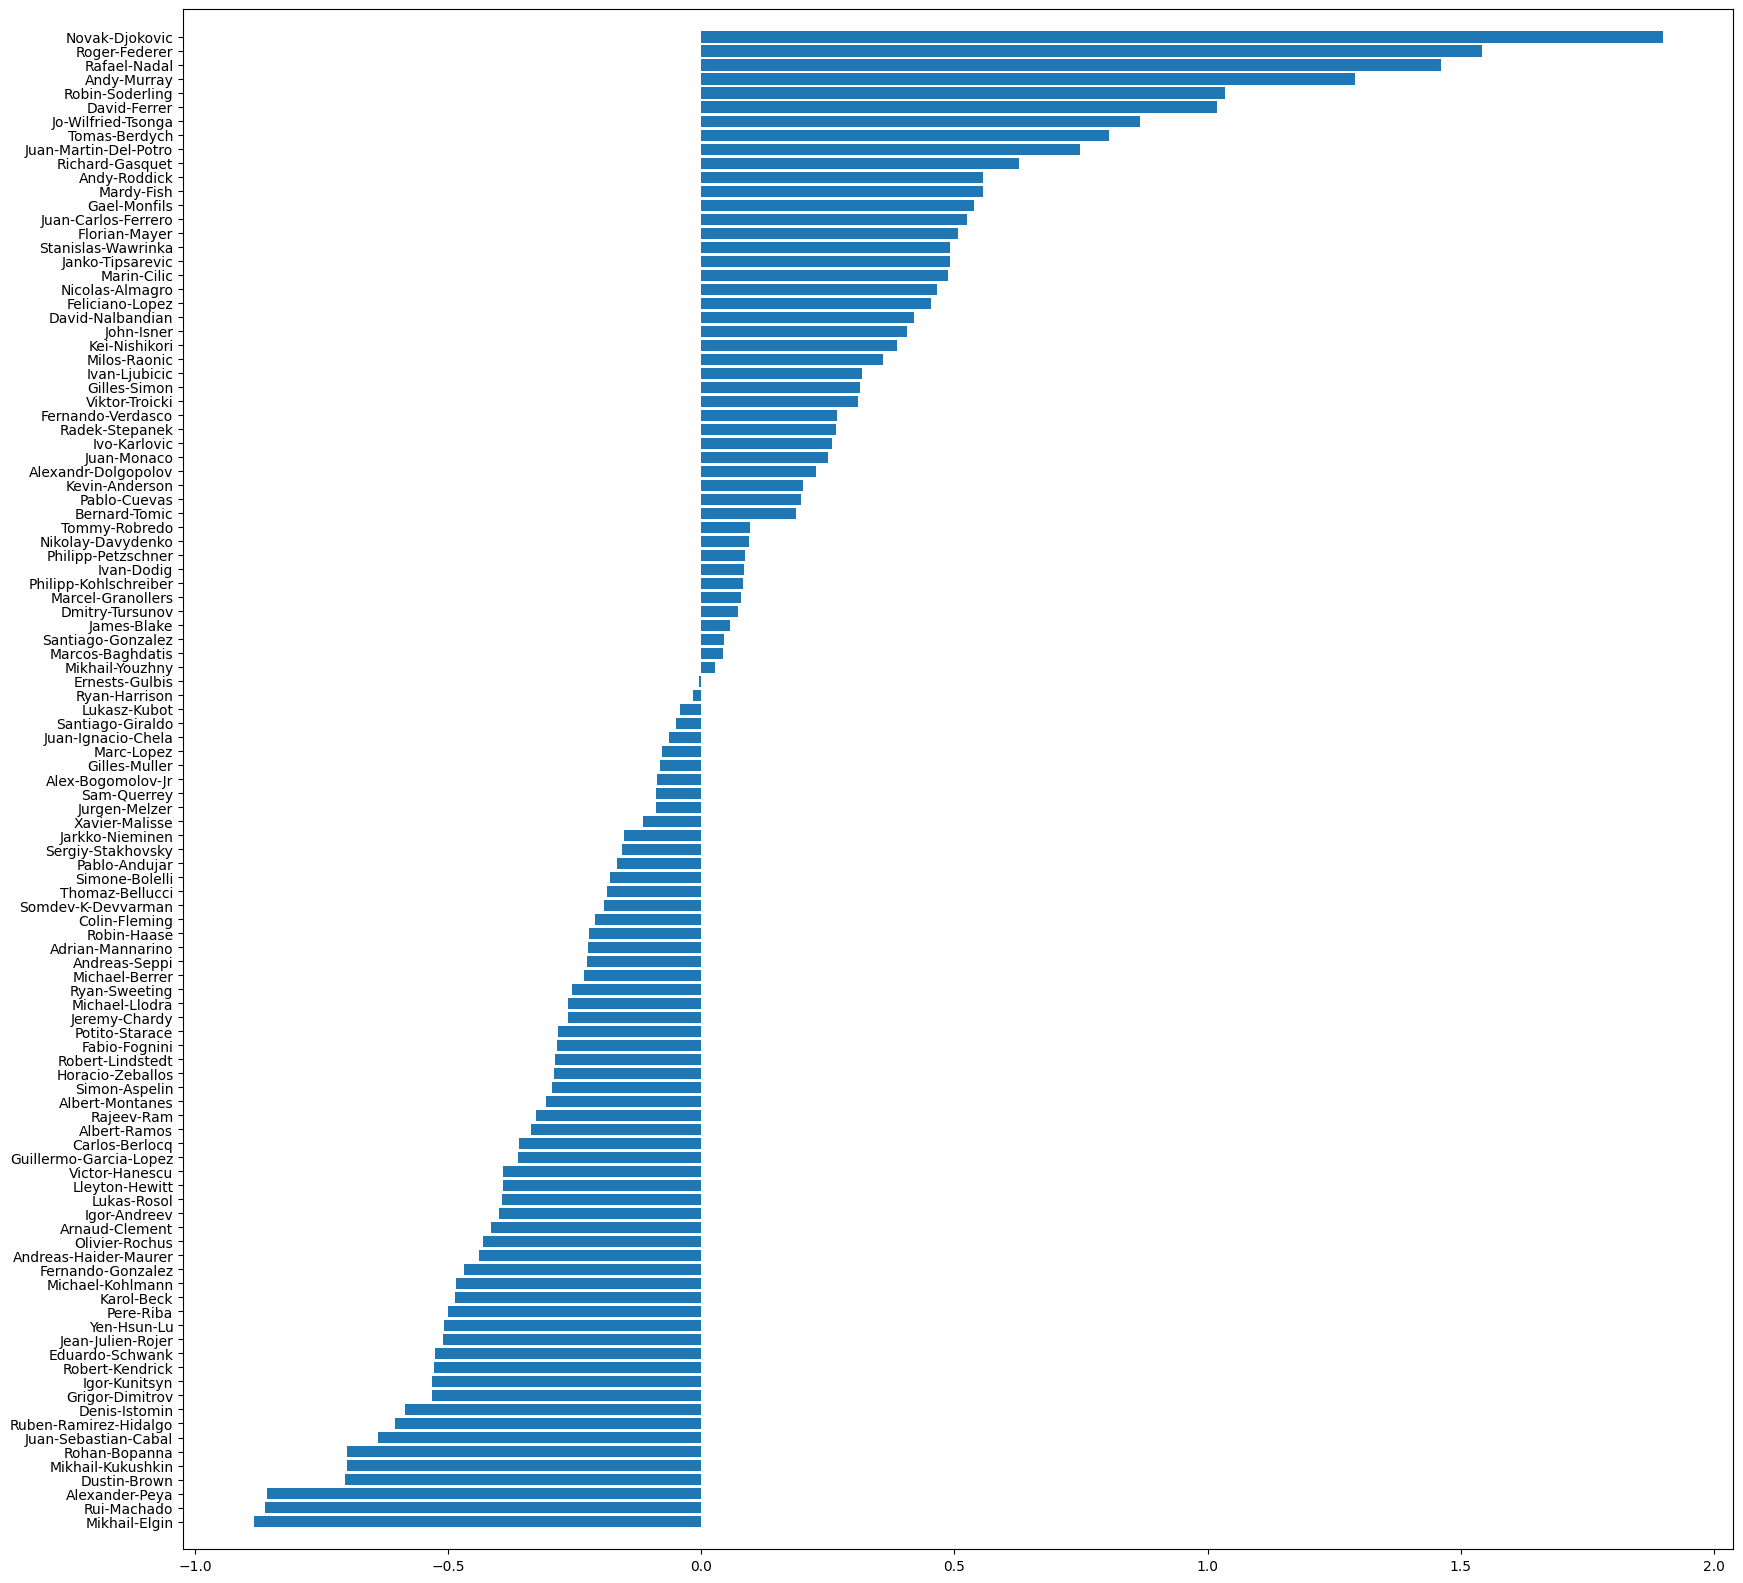

In [83]:
gibbs_means = np.mean(skill_samples[:,idxs], axis=1)
sorted_barplot(gibbs_means, W)

3) Message passing

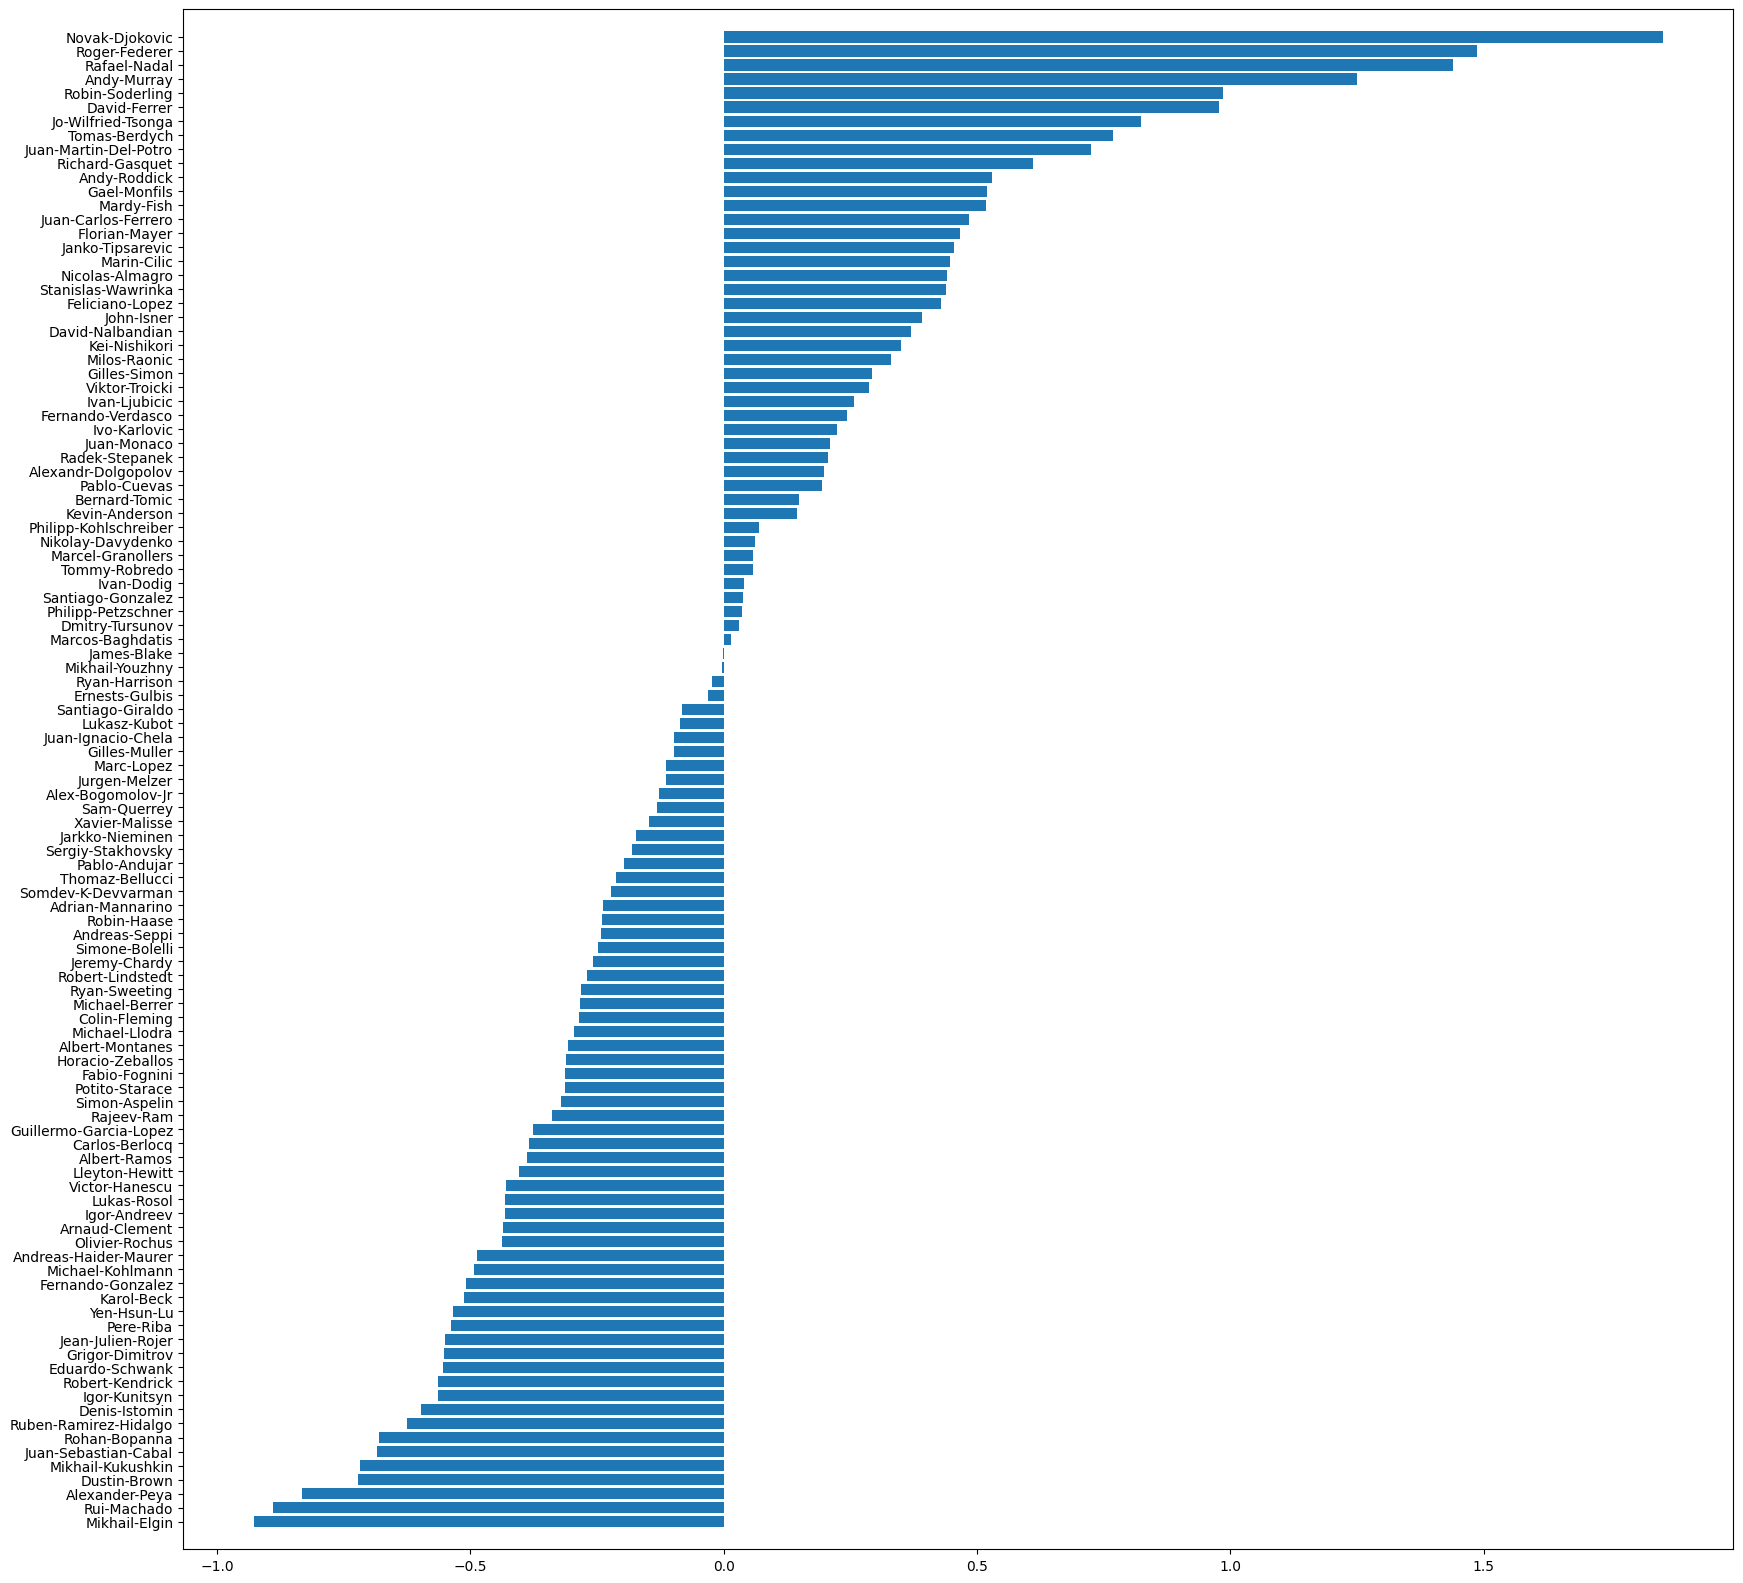

In [75]:
sorted_barplot(mean_player_skills,W)

In [85]:
gibbs_rankings = np.argsort(gibbs_means)

In [100]:
W

array([['Rafael-Nadal'],
       ['Juan-Monaco'],
       ['Juan-Martin-Del-Potro'],
       ['Mardy-Fish'],
       ['Roger-Federer'],
       ['Jo-Wilfried-Tsonga'],
       ['Guillermo-Garcia-Lopez'],
       ['Florian-Mayer'],
       ['Milos-Raonic'],
       ['Santiago-Giraldo'],
       ['Andy-Murray'],
       ['Richard-Gasquet'],
       ['David-Nalbandian'],
       ['Gilles-Muller'],
       ['Andy-Roddick'],
       ['Novak-Djokovic'],
       ['Fernando-Verdasco'],
       ['Ivan-Dodig'],
       ['Ryan-Sweeting'],
       ['Radek-Stepanek'],
       ['John-Isner'],
       ['Pablo-Andujar'],
       ['Ivan-Ljubicic'],
       ['Robin-Soderling'],
       ['Feliciano-Lopez'],
       ['Marin-Cilic'],
       ['Marcos-Baghdatis'],
       ['Michael-Llodra'],
       ['Gael-Monfils'],
       ['David-Ferrer'],
       ['Jarkko-Nieminen'],
       ['Kei-Nishikori'],
       ['Alexandr-Dolgopolov'],
       ['Tomas-Berdych'],
       ['Somdev-K-Devvarman'],
       ['Ivo-Karlovic'],
       ['Olivier-Rochus'],
 

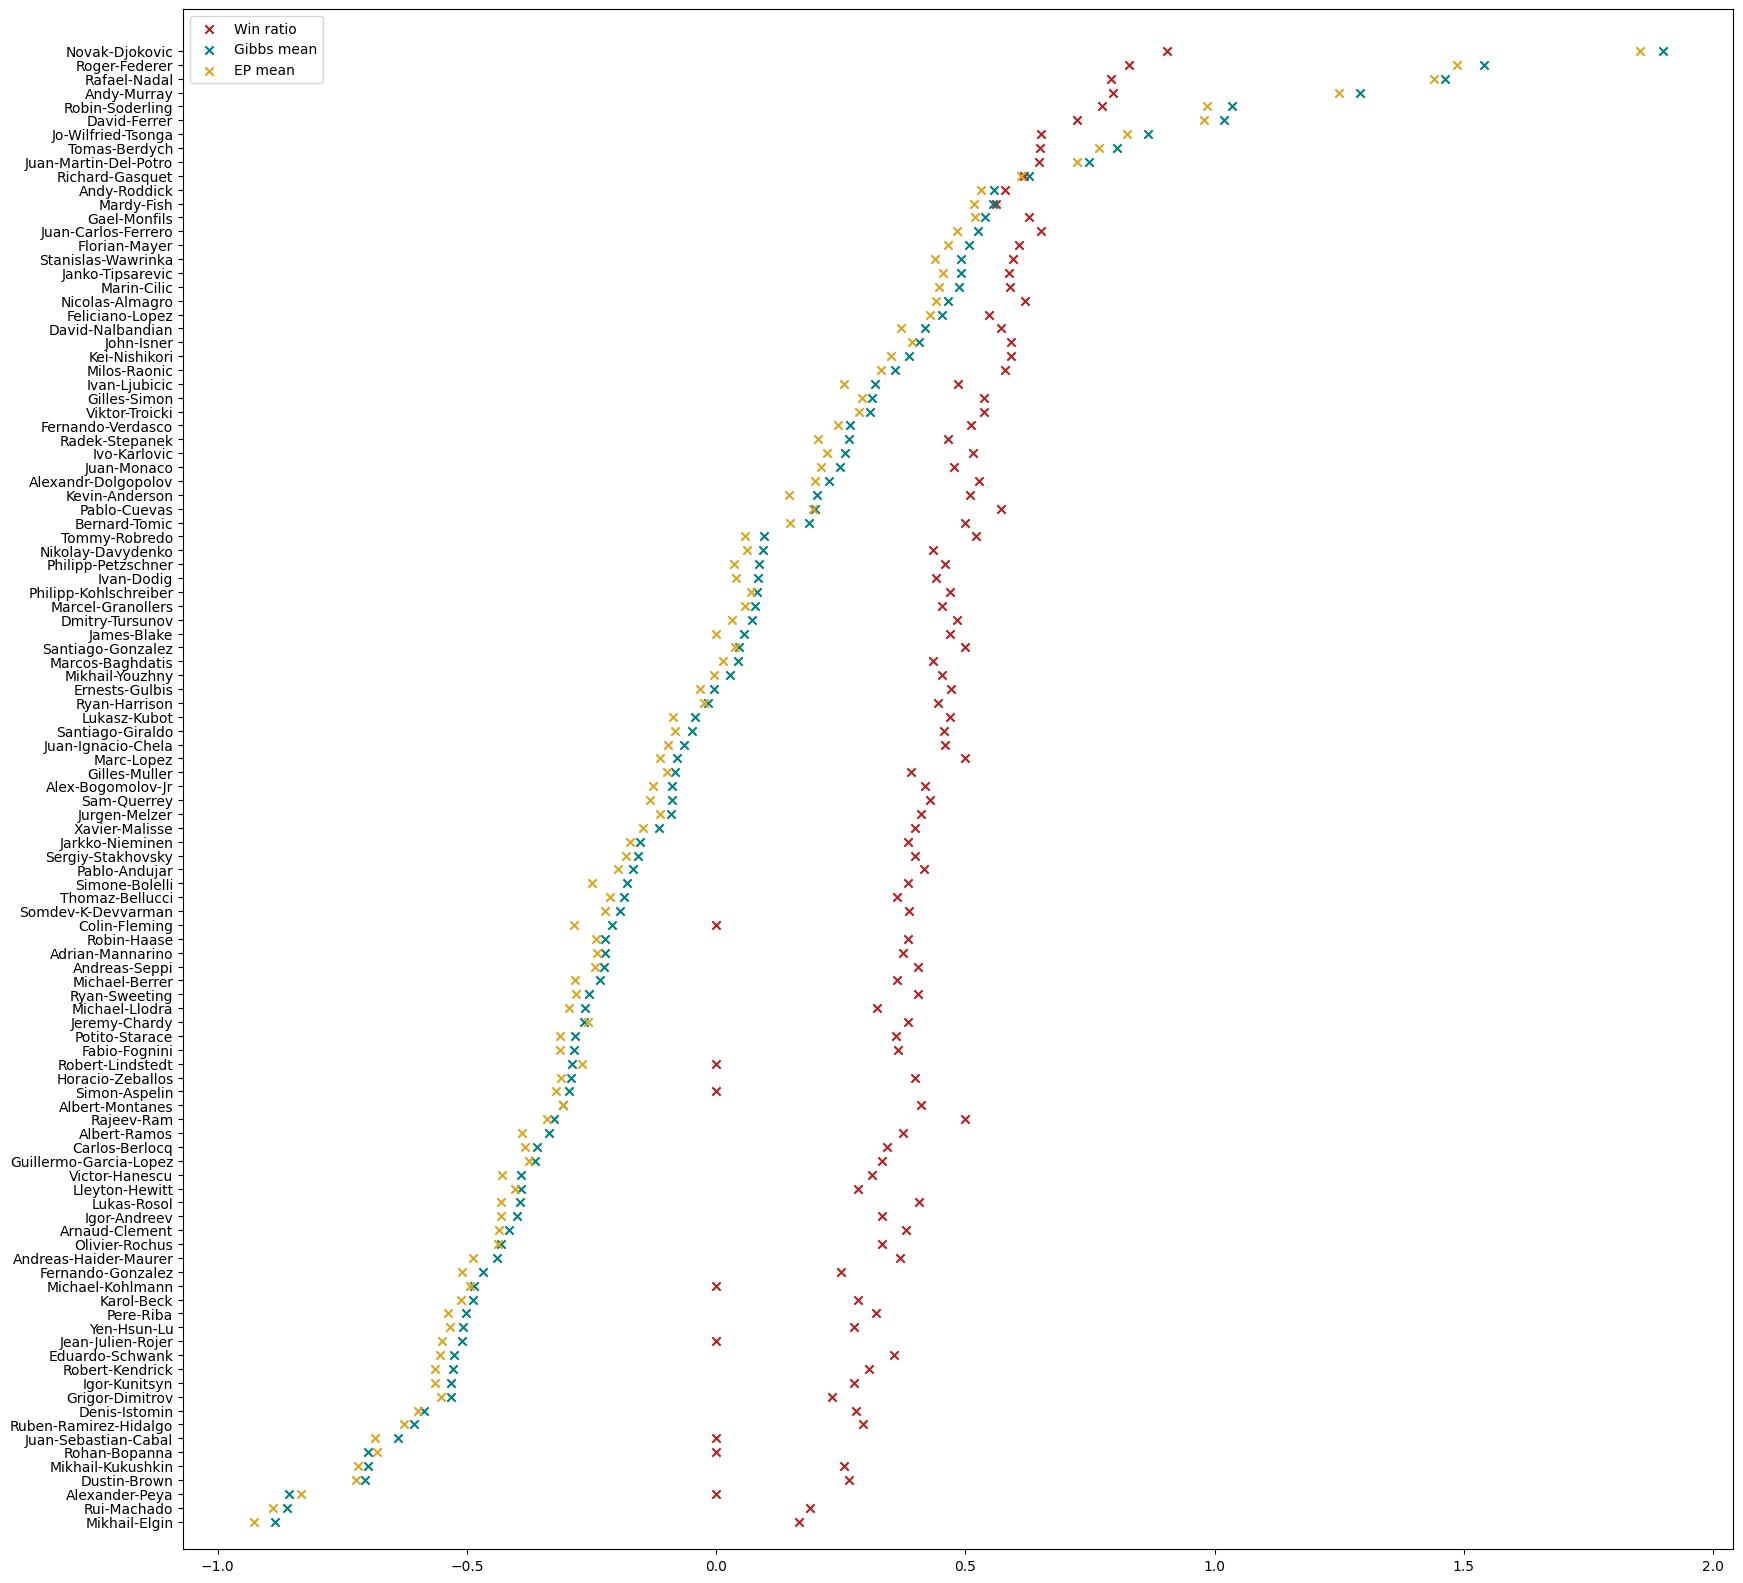

In [115]:
gibbs_rankings = np.argsort(gibbs_means)
sorted_names = W[gibbs_rankings]

xx = np.linspace(0, len(mean_player_skills)-1, len(mean_player_skills))
plt.figure(figsize=(20, 20))
plt.scatter(win_ratios[gibbs_rankings], xx, marker="x", color="firebrick", label="Win ratio")
plt.scatter(gibbs_means[gibbs_rankings], xx, marker="x", color="teal", label="Gibbs mean")
plt.scatter(mean_player_skills[gibbs_rankings], xx, marker="x", color="goldenrod", label="EP mean")
plt.yticks(xx, labels=sorted_names[:, 0])
plt.ylim([-2, 109])
plt.legend()